### Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

Sample Data -
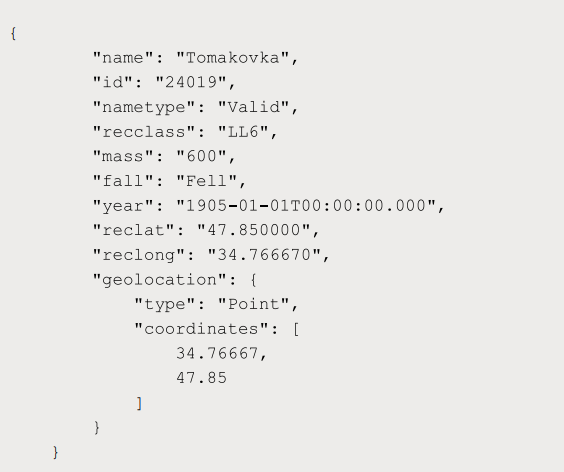

Excepted Output Data Attributes                                                    
● Name of Earth Meteorite - string id - ID of Earth                       
● Meteorite - int nametype - string recclass - string                           
● mass - Mass of Earth Meteorite - float year - Year at which Earth                  
● Meteorite was hit - datetime format reclat - float recclong - float                         
● point coordinates - list of int                               

In [3]:
import requests
import csv

def download_data(url):
    response = requests.get(url, verify=False)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to download data.")
        return None

def convert_to_csv(data, csv_filename):
    # Define the field names for the CSV file
    fieldnames = ["Name of Earth Meteorite", "id", "nametype", "recclass", "mass", "fall", "year", "reclat", "reclong", "point coordinates"]

    # Open the CSV file for writing with UTF-8 encoding
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        
        # Write the header row
        writer.writeheader()

        # Write each meteorite as a row in the CSV file
        for meteorite in data:
            geolocation = meteorite.get("geolocation", {})
            row = {
                "Name of Earth Meteorite": meteorite.get("name", ""),
                "id": meteorite.get("id", ""),
                "nametype": meteorite.get("nametype", ""),
                "recclass": meteorite.get("recclass", ""),
                "mass": meteorite.get("mass", ""),
                "fall": meteorite.get("fall", ""),
                "year": meteorite.get("year", ""),
                "reclat": meteorite.get("reclat", ""),
                "reclong": meteorite.get("reclong", ""),
                "point coordinates": geolocation.get("coordinates", [])
            }
            writer.writerow(row)

        print("CSV file created successfully.")

# Main program
if __name__ == '__main__':
    url = "https://data.nasa.gov/resource/y77d-th95.json"
    csv_filename = "meteorite_data.csv"

    # Download the data
    data = download_data(url)
    if data:
        # Convert the data to CSV
        convert_to_csv(data, csv_filename)


C:\Users\pallabi.sahoo\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.nasa.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


CSV file created successfully.
